# P4: DATA ANALYSIS: Further analysis

### Notebook Description

This notebook is a continuation of the analysis of flight data and delays. From this point, the available datasets will be merged, allowing for additional analyses

####
## Notebook Configuration

<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Libraries import</p>

In [19]:
from psycopg2 import connect
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Connecting to the database</p>

In [2]:
cnx = connect(user='postgres_user', password='coderslab', host='localhost', database='airlines')

<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Creating the 'read_sql_table' method to extract data from the database</p>

In [3]:
def read_sql_table(table_name):
    query = f"SELECT * FROM {table_name}"
    cursor = cnx.cursor()
    cursor.execute(query)
    column_names = [desc[0] for desc in cursor.description]
    results = cursor.fetchall()
    cursor.close()
    cnx.close()
    df = pd.DataFrame(results, columns=column_names)   
    return df

<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Loading the DataFrame 'flight_df_01', saved as a .csv file in the previous notebook</p>

In [4]:
flight_df = pd.read_csv("/Users/me/PycharmProjects/Airlines_Delays_Analysis/data/processed/flight_df_01.csv")

In [5]:
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,distance_group,year,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,is_delayed,is_weekend,distance_agg
0,0,1,1,2,9E,N931XJ,3290,10874,10397,600,...,3,2019,NaN,NaN,NaN,NaN,NaN,False,False,"(500, 600]"
1,1,1,1,2,OH,N723PS,5495,10874,11057,704,...,2,2019,NaN,NaN,NaN,NaN,NaN,True,False,"(300, 400]"
2,2,1,1,2,OH,N525EA,5416,10874,11057,1944,...,2,2019,NaN,NaN,NaN,NaN,NaN,False,False,"(300, 400]"
3,3,1,1,2,OH,N706PS,5426,10874,11057,1521,...,2,2019,NaN,NaN,NaN,NaN,NaN,False,False,"(300, 400]"
4,4,1,1,2,OH,N262PS,5440,10874,14100,756,...,2,2019,NaN,NaN,NaN,NaN,NaN,False,False,"(300, 400]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6922919,9251553,12,30,1,MQ,N818AE,3744,12511,13930,1411,...,2,2019,2.0,0.0,0.0,0.0,31.0,True,False,"(400, 500]"
6922920,9251554,12,30,1,MQ,N821AE,4235,12511,11298,1615,...,2,2019,NaN,NaN,NaN,NaN,NaN,False,False,"(300, 400]"
6922921,9251556,12,31,2,MQ,N245NN,4040,12511,11298,745,...,2,2019,224.0,129.0,0.0,0.0,0.0,True,False,"(300, 400]"
6922922,9251557,12,31,2,MQ,N806AE,3744,12511,13930,1411,...,2,2019,3.0,0.0,0.0,0.0,71.0,True,False,"(400, 500]"


###
## Enriching The Dataset With Additional Information From The 'aircraft' Table

<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Loading the 'aircraft' table form the database</p>

In [6]:
aircraft_df = read_sql_table('aircraft')
aircraft_df

,id,manufacture_year,tail_num,number_of_seats
0,0,1944,N54514,0.0
1,1,1945,N1651M,0.0
2,2,1953,N100CE,0.0
3,3,1953,N141FL,0.0
4,4,1953,N151FL,0.0
...,...,...,...,...
7378,7378,2019,N14011,337.0
7379,7379,2019,N16008,337.0
7380,7380,2019,N16009,337.0
7381,7381,2019,N2250U,276.0


<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Dropping the 'number_of_seats' column and removing possible data duplicates from the 'aircraft' DataFrame</p>

In [7]:
aircraft_df = aircraft_df.drop(['number_of_seats', 'id'], axis=1).drop_duplicates()

<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Additionally, verifying and removing any duplicates within the tail_num column. Specifically, checking if a single tail_num is associated with more than one year of production.</p>

In [8]:
tail_duplicates = aircraft_df['tail_num'].duplicated()
if tail_duplicates.any():
    aircraft_df_duplicated = aircraft_df[tail_duplicates]
    aircraft_df.drop_duplicates(subset='tail_num', keep='last', inplace=True)

<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Setting the 'manufacture_year' to the highest value for any duplicate 'tail_num' entries</p>

In [9]:
aircraft_df['manufacture_year'] = aircraft_df.groupby('tail_num')['manufacture_year'].transform('max')
aircraft_df = aircraft_df.drop_duplicates()

<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Joining DataFrames 'aircraft_df' together with 'flight_df'</p>

In [10]:
tmp_flight_df = flight_df.merge(aircraft_df, on='tail_num', how='left')

<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Checking for possible duplicates</p>

In [11]:
duplicates = tmp_flight_df.duplicated()
duplicates.value_counts()

False    6922924
Name: count, dtype: int64

<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Overwriting the temporary DataFrame 'mp_flight_df' from above, with 'flight_df'</p>

In [12]:
flight_df = tmp_flight_df.copy()

###
## Further Analysis

### Delays vs. Production Year p1

<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Interpolating missing manufacture years, converting them to integers, and analyzing delays and flight counts grouped by aircraft manufacture year</p>

In [25]:
flight_df["manufacture_year"] = flight_df["manufacture_year"].interpolate(method='linear')

In [26]:
flight_df["manufacture_year"] = flight_df["manufacture_year"].astype(np.int64)

In [27]:
flight_df["manufacture_year"].unique()

array([2008, 2004, 2005, 2016, 2003, 2002, 2010, 2006, 2007, 2009, 2014,
       2001, 1991, 1997, 2012, 2015, 2013, 1993, 1987, 1992, 1988, 2011,
       1995, 1999, 1996, 2000, 2017, 1990, 1998, 2018, 1994, 2019, 1989])

In [28]:
delays_by_manufacture_year_df = flight_df.groupby('manufacture_year').agg({'dep_delay': 'mean', 'tail_num': 'count'}).reset_index()
delays_by_manufacture_year_df.columns = ['manufacture_year', 'average_delay', 'flight_count']

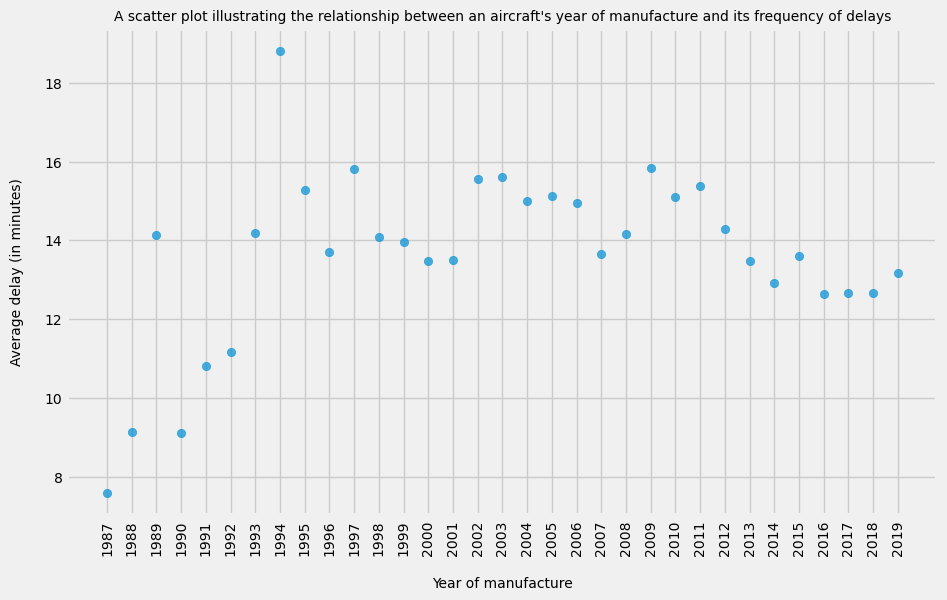

In [30]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.scatter(delays_by_manufacture_year_df['manufacture_year'], delays_by_manufacture_year_df['average_delay'], alpha=0.7)
plt.xlabel('Year of manufacture',fontsize=10, labelpad=15)
plt.ylabel('Average delay (in minutes)',fontsize=10, labelpad=15)
plt.title("A scatter plot illustrating the relationship between an aircraft's year of manufacture and its frequency of delays", fontsize=10)
start_year = delays_by_manufacture_year_df['manufacture_year'].min()
end_year = delays_by_manufacture_year_df['manufacture_year'].max()
year_step = 1
x_ticks = np.arange(start_year, end_year + 1, year_step)
plt.xticks(x_ticks, rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

### Key Observations
???

<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Customizing the chart to filter and display only years with more than 10,000 flights</p>

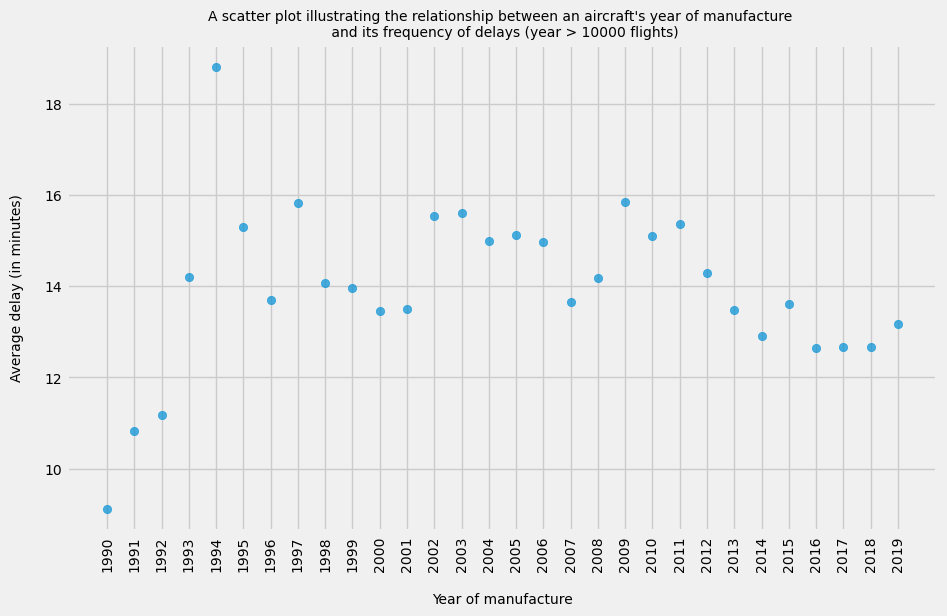

In [34]:
flights_10k = delays_by_manufacture_year_df[delays_by_manufacture_year_df['flight_count'] > 10000]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.scatter(flights_10k['manufacture_year'], flights_10k['average_delay'], alpha=0.7)
plt.xlabel('Year of manufacture',fontsize=10, labelpad=15)
plt.ylabel('Average delay (in minutes)',fontsize=10, labelpad=15)
plt.title("A scatter plot illustrating the relationship between an aircraft's year of manufacture \n and its frequency of delays (year > 10000 flights)",fontsize=10)
start_year = flights_10k['manufacture_year'].min()
end_year = flights_10k['manufacture_year'].max()
year_step = 1
x_ticks = np.arange(start_year, end_year + 1, year_step)
plt.xticks(x_ticks, rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

### Key Observations
???

## Delays vs. Production Year p2

 ## Opóźnienia vs. rok produkcji samolotu cz. 2
 Dokonaj agregacji kolumny `manufacture_year` do kolumny `manufacture_year_agg` zgodnie z poniższym:
 1. Grupując dane co 3 lata -> Czy po grupowaniu można zauważyć zależność? Wyniki zapisz do ramki `flight_delays_by_manufacture_year_agg_df`.
 1. Wyznacz top 5 roczników samolotu, które wykonały najwięcej lotów. Wyniki zapisz do ramki `top_manufactured_df`, do obliczeń wykorzystaj `delays_by_manufacture_year_df`.

<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Aggregating the manufacture_year values into 3-year groups in the manufacture_year_agg column</p>

In [39]:
flight_df['manufacture_year_agg'] = flight_df['manufacture_year'] // 3 * 3

<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Assinging 'manufacture_year_agg' to 'flight_delays_by_manufacture_year_agg_df' variable</p>

In [40]:
flight_delays_by_manufacture_year_agg_df = flight_df.groupby('manufacture_year_agg').agg({'dep_delay': 'mean', 'tail_num': 'count'}).reset_index()
flight_delays_by_manufacture_year_agg_df.columns = ['manufacture_year_agg', 'average_delay', 'flight_count']

<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Drawing a scatterplot based on the 'flight_delays_by_manufacture_year_agg_df'</p>

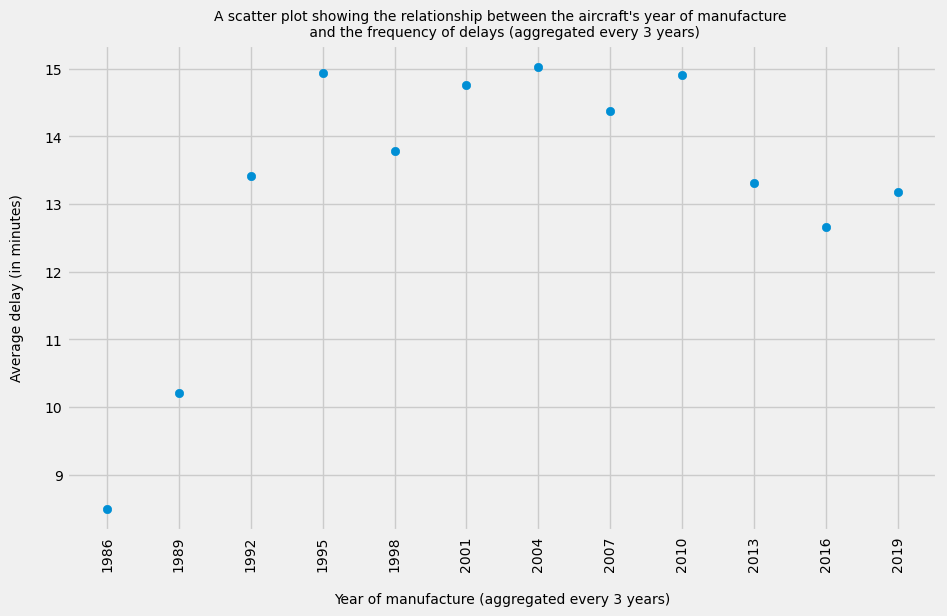

In [45]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.scatter(flight_delays_by_manufacture_year_agg_df['manufacture_year_agg'], flight_delays_by_manufacture_year_agg_df['average_delay'])
plt.xlabel('Year of manufacture (aggregated every 3 years)',fontsize=10, labelpad=15)
plt.ylabel('Average delay (in minutes)',fontsize=10, labelpad=15)
plt.title("A scatter plot showing the relationship between the aircraft's year of manufacture \n and the frequency of delays (aggregated every 3 years)",fontsize=10)
start_year = flight_delays_by_manufacture_year_agg_df['manufacture_year_agg'].min()
end_year = flight_delays_by_manufacture_year_agg_df['manufacture_year_agg'].max()
year_step = 3
x_ticks = np.arange(start_year, end_year + 3, year_step)
plt.xticks(x_ticks, rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

### Key Observations
???

<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Selecting the top 5 aircraft manufacture years with the most flights based on flight count</p>

In [46]:
top5_manufactured_df = delays_by_manufacture_year_df.nlargest(5, 'flight_count')
top5_manufactured_df

,manufacture_year,average_delay,flight_count
14,2001,13.505254,491058
17,2004,14.992950,483943
29,2016,12.649388,413679
18,2005,15.121638,408015
16,2003,15.608392,374525


### Key Observations
???

####
<p style='background-color: #FFFFE0; margin-top:20px; padding:5px 15px; font-weight: 500'>Savind DataFrame for futher analysis</p>

In [ ]:
flight_df.to_csv("/Users/me/PycharmProjects/Airlines_Delays_Analysis/data/processed/flight_df_02.csv", index=False)